# Practica 2: tipologia y ciclo de vida de los datos

BY LEIRE ALEGRIA MURILLO Y LAURA BELENGUER QUEROL

In [15]:
#Importing required packages
import pandas as pd

### Graphic libraries
import matplotlib.pyplot as plt
import seaborn as sns 

# 1. Descripción del dataset

(Describir el dataset y las variables)

Tenemos un dataset sobre vinos.

La variable de interes es "quality": La calidad de los diferentes vinos.

Tenemos 1599 observaciones y 12 variables.

In [5]:
# Cargamos los datos
wine = pd.read_csv('winequality-red.csv')

In [14]:
# Dimension del dataset
wine.shape

(1599, 12)

In [6]:
# Observamos nuestros datos y comprobamos que esten bien cargados
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 1.1 Analizar la variable target

Su valor esta entre 0 y 10. Observamos que solo tenemos valores entre 3 y 8. la mayoria de los vinos tienen una calificacion de 5 o 6. 

In [21]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

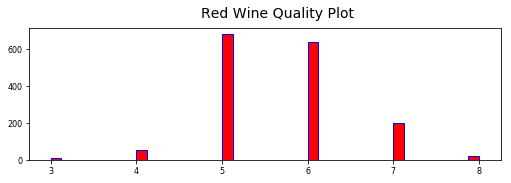

In [17]:
# Target distribution
wine[target].hist(bins=40, edgecolor='b', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False, figsize=(6,2), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Red Wine Quality Plot', x=0.65, y=1.25, fontsize=14); 

Si un vino es excelente tiene una nota de 7 o superior, por lo que mas adelante creamos una variable llamada 'rating' donde clasificamos los vinos entre 'superior' o 'inferior'. Si su nota es superios a 7 sera superior, de lo contrario sera inferior.

In [ ]:
# Para crear una nueva variable
# (por ahora no ejecutar)
conditions = [
    (wine['quality'] >= 7),
    (wine['quality'] <= 4)
]
rating = ['superior','inferior']
wine['rating'] = np.select(conditions,rating,default = 'fine')
wine.rating.value_counts()

## 1.2 Analizamos el resto de variables

In [8]:
#Informacion sobre las columnas
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
# Extracting our target variable 
# and creating a usefull feature list of dependant variables
target = 'quality'
features_list = list(wine.columns)
features_list.remove(target)

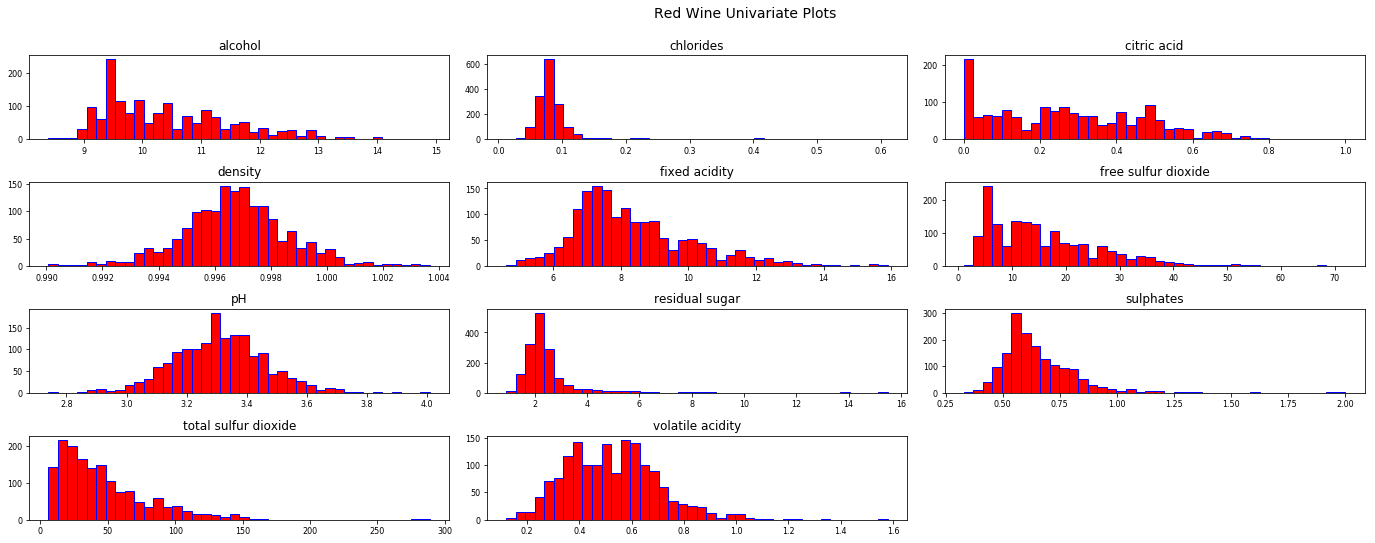

In [16]:
# Histogramas de todas las variables
wine[features_list].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=14);  

# 2. Integración y selección de los datos de interés a analizar

(analizaremos todos los datos ya que estan todas las columnas completas y no son muchas)

# 3. Limpieza de los datos

## 3.1. ¿Los datos contienen ceros o elementos vacíos? ¿Cómo gestionarías cada uno de estos casos? 

In [10]:
# No hoy valores nulos
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 3.2. Identificación y tratamiento de valores extremos.

(identificaremos los valores extremos con boxplot)

# 4. Análisis de los datos.

## 4.1. Selección de los grupos de datos que se quieren analizar/comparar (planificación de los análisis a aplicar). 

## 4.2. Comprobación de la normalidad y homogeneidad de la varianza.

## 4.3. Aplicación de pruebas estadísticas para comparar los grupos de datos. En función de los datos y el objetivo del estudio, aplicar pruebas de contraste de hipótesis, correlaciones, regresiones, etc. Aplicar al menos tres métodos de análisis diferentes.

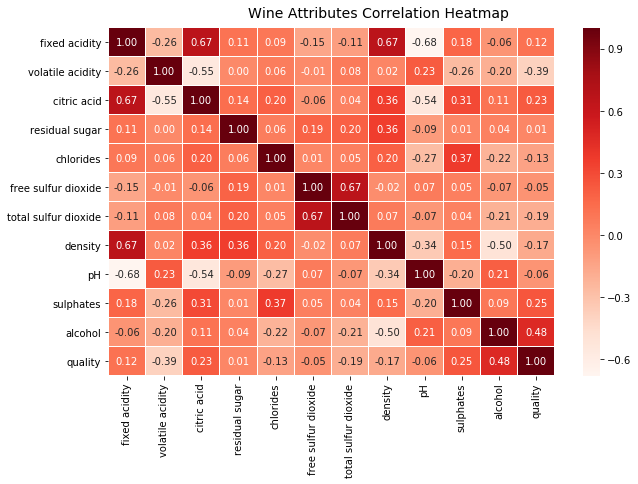

In [19]:
# Correlation matrix

# for visualizing correlations
f, ax = plt.subplots(figsize=(10, 6))
corr = wine.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Reds",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

Podemos ver que el nivel de alcohol tiene la correlación positiva más fuerte (0,48) con la notación de calidad.

También hay una correlación negativa comprensible entre el 'pH' y la 'acidez fija' del vino:

i) el pH es la medida de acidez / basicidad con una escala entre 0 (muy ácido) y 14 (muy básico) con una escala media a 7 (neutral)

ii) la definición de pH es el logaritmo negativo del ion H + (ion hidrógeno)

iii) así que cuanto más ácida es una solución, cuanto más alta es la concentración de H +, más pH tiende a 0.

iv) como se indica en la descripción de los datos, la mayoría de los vinos son ácidos y tienen un pH de 3-4

# 5. Representación de los resultados a partir de tablas y gráficas.

# 6. Resolución del problema. A partir de los resultados obtenidos, ¿cuáles son las conclusiones? ¿Los resultados permiten responder al problema.

# Biografia

https://github.com/ranjitkumarpatnaik/winequality-redwine/blob/master/winequality-red.ipynb
    
https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine

http://rpubs.com/jeswin_george/explore_red_quality_wines

https://github.com/paulgx/tipologiapractica2/blob/master/practica2Tipologia.pdf

https://www.kaggle.com/datacog314/tutorial-machine-learning-interpretability

# Donde se pueden descargar los datos:

https://archive.ics.uci.edu/ml/datasets/wine+quality